In [1]:
import pandas as pd

df = pd.read_csv("train.csv")

In [2]:
df.head()

,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0


In [3]:
df.describe()

,id,num_sold
count,230130.000000,221259.000000
mean,115064.500000,752.527382
std,66432.953062,690.165445
min,0.000000,5.000000
25%,57532.250000,219.000000
50%,115064.500000,605.000000
75%,172596.750000,1114.000000
max,230129.000000,5939.000000


In [5]:
df.isnull().sum()

id             0
date           0
country        0
store          0
product        0
num_sold    8871
dtype: int64

In [7]:
missing_pattern = df[df["num_sold"].isnull()]
print(missing_pattern)

            id        date country              store            product  \
0            0  2010-01-01  Canada  Discount Stickers  Holographic Goose   
45          45  2010-01-01   Kenya  Discount Stickers  Holographic Goose   
90          90  2010-01-02  Canada  Discount Stickers  Holographic Goose   
135        135  2010-01-02   Kenya  Discount Stickers  Holographic Goose   
180        180  2010-01-03  Canada  Discount Stickers  Holographic Goose   
...        ...         ...     ...                ...                ...   
229905  229905  2016-12-29   Kenya  Discount Stickers  Holographic Goose   
229950  229950  2016-12-30  Canada  Discount Stickers  Holographic Goose   
229995  229995  2016-12-30   Kenya  Discount Stickers  Holographic Goose   
230040  230040  2016-12-31  Canada  Discount Stickers  Holographic Goose   
230085  230085  2016-12-31   Kenya  Discount Stickers  Holographic Goose   

        num_sold  
0            NaN  
45           NaN  
90           NaN  
135        

In [8]:
df.tail()

,id,date,country,store,product,num_sold
230125,230125,2016-12-31,Singapore,Premium Sticker Mart,Holographic Goose,466.0
230126,230126,2016-12-31,Singapore,Premium Sticker Mart,Kaggle,2907.0
230127,230127,2016-12-31,Singapore,Premium Sticker Mart,Kaggle Tiers,2299.0
230128,230128,2016-12-31,Singapore,Premium Sticker Mart,Kerneler,1242.0
230129,230129,2016-12-31,Singapore,Premium Sticker Mart,Kerneler Dark Mode,1622.0


In [9]:
submission = pd.read_csv("sample_submission.csv")
submission.tail()

,id,num_sold
98545,328675,100
98546,328676,100
98547,328677,100
98548,328678,100
98549,328679,100


Predict from id 230130 till 328679

In [11]:
test = pd.read_csv("test.csv")
test.head()


,id,date,country,store,product
0,230130,2017-01-01,Canada,Discount Stickers,Holographic Goose
1,230131,2017-01-01,Canada,Discount Stickers,Kaggle
2,230132,2017-01-01,Canada,Discount Stickers,Kaggle Tiers
3,230133,2017-01-01,Canada,Discount Stickers,Kerneler
4,230134,2017-01-01,Canada,Discount Stickers,Kerneler Dark Mode


In [12]:
test.tail()

,id,date,country,store,product
98545,328675,2019-12-31,Singapore,Premium Sticker Mart,Holographic Goose
98546,328676,2019-12-31,Singapore,Premium Sticker Mart,Kaggle
98547,328677,2019-12-31,Singapore,Premium Sticker Mart,Kaggle Tiers
98548,328678,2019-12-31,Singapore,Premium Sticker Mart,Kerneler
98549,328679,2019-12-31,Singapore,Premium Sticker Mart,Kerneler Dark Mode


In [13]:
(8871/230129)*100

3.8547944848324205

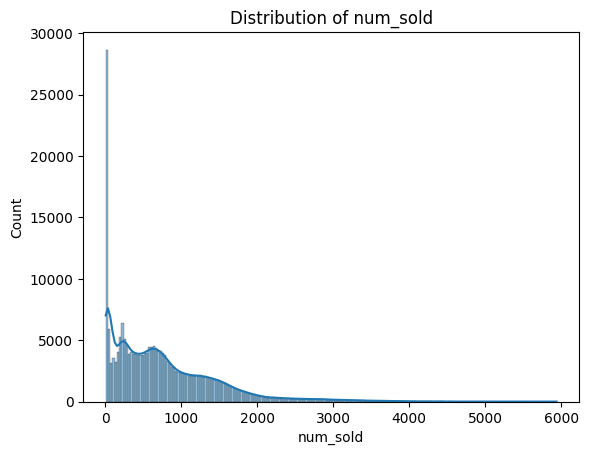

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['num_sold'], kde = True)
plt.title("Distribution of num_sold")
plt.show()

In [21]:
df['num_sold'] = df.groupby(['country','store','product'])['num_sold'].transform(lambda x: x.fillna(x.median()))

df['num_sold'] = df.groupby(['country'])['num_sold'].transform(lambda x: x.fillna(x.median()))
df['num_sold'] = df.groupby(['store'])['num_sold'].transform(lambda x: x.fillna(x.median()))
df['num_sold'] = df.groupby(['product'])['num_sold'].transform(lambda x: x.fillna(x.median()))
df['num_sold'] = df['num_sold'].fillna(df['num_sold'].median())

df['num_sold']


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


0          710.0
1          973.0
2          906.0
3          423.0
4          491.0
           ...  
230125     466.0
230126    2907.0
230127    2299.0
230128    1242.0
230129    1622.0
Name: num_sold, Length: 230130, dtype: float64

In [22]:
df.isnull().sum()

id          0
date        0
country     0
store       0
product     0
num_sold    0
dtype: int64